<a href="https://colab.research.google.com/github/josho08/cd-my-first-repo/blob/main/Copy_of_imageSubdivision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from shapely.geometry import Polygon
import leafmap

In [ ]:
%pip install geopy
%pip install geopandas






In [ ]:
def create_polygon_from_bbox(min_point, max_point):
    """
    Create a polygon (rectangle) from a bounding box defined by minimum and maximum points.

    Parameters:
    - min_point (tuple): The minimum point (longitude, latitude) of the bounding box.
    - max_point (tuple): The maximum point (longitude, latitude) of the bounding box.

    Returns:
    - list of tuples: Four vertices of the rectangle defined by the bounding box, in clockwise order.
    """
    min_lon, min_lat = min_point
    max_lon, max_lat = max_point

    # Define the four corners of the rectangle
    bottom_left = (min_lon, min_lat)
    bottom_right = (max_lon, min_lat)
    top_right = (max_lon, max_lat)
    top_left = (min_lon, max_lat)

    # List the vertices in clockwise order
    vertices = [bottom_left, bottom_right, top_right, top_left]

    return vertices

In [ ]:
import geopy.distance



In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in meters between two points
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371000 # Radius of Earth in meters
    return c * r

def rectangle_dimensions(min_vertex, max_vertex):
    """
    Input: min_vertex - a tuple representing the (latitude, longitude) of the bottom left vertex.
           max_vertex - a tuple representing the (latitude, longitude) of the top right vertex.
    Output: Returns the length and width of the rectangle in meters.
    """
    # Extract latitude and longitude for min and max vertices
    min_lat, min_lon = min_vertex
    max_lat, max_lon = max_vertex

    # Calculate length and width
    length = geopy.distance.geodesic((min_lat, min_lon), (max_lat, min_lon)).m
    width = geopy.distance.geodesic((min_lat, min_lon), (min_lat, max_lon)).m
    #length = haversine(min_lat, min_lon, max_lat, min_lon)  # Distance between bottom left and top left
    #width = haversine(min_lat, min_lon, min_lat, max_lon)  # Distance between bottom left and bottom right

    return length, width


In [ ]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.5/262.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

In [ ]:
m = leafmap.Map(center=[19.045589, 72.849362], zoom=19)
#m = leafmap.Map(center=[29.676840, -95.369222], zoom=19)
m.add_basemap("SATELLITE")


In [ ]:
#m

In [ ]:
# bbox = m.user_roi_bounds()
# print(bbox)

In [ ]:
# if m.user_roi_bounds() is not None:
#     bbox = m.user_roi_bounds()
# else:
bbox = [72.8488, 19.0384, 72.8604, 19.0484]

In [ ]:
longitude = 0
latitude = 0

pointA = (bbox[0], bbox[1])
pointC = (bbox[2] , bbox[3])
pointB = (bbox[2] , bbox[3])
touplA = (longitude, latitude)
touplA  = rectangle_dimensions(pointA, pointB)




print(touplA)

(1294.5127019869128, 329.282713184461)


In [ ]:
def create_geodataframe_from_bbox(min_point, max_point):
    """
    Create a GeoDataFrame from a bounding box defined by minimum and maximum points.

    Parameters:
    - min_point (tuple): The minimum point (longitude, latitude) of the bounding box.
    - max_point (tuple): The maximum point (longitude, latitude) of the bounding box.

    Returns:
    - GeoDataFrame: A GeoDataFrame with a single row containing the Polygon.
    """
    # Create the Polygon using the bounding box
    min_lon, min_lat = min_point
    max_lon, max_lat = max_point
    rectangle = Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])

    # Convert the Polygon into a GeoDataFrame
    gdf = gpd.GeoDataFrame([1], geometry=[rectangle], columns=['dummy'])
    return gdf

In [ ]:
gdf = create_geodataframe_from_bbox(pointA,pointB)

In [ ]:
print(gdf)

   dummy                                           geometry
0      1  POLYGON ((72.84880 19.03840, 72.86040 19.03840...


In [ ]:
import geopandas as gpd
teest_ =create_polygon_from_bbox(pointA, pointB)




bbox_polygon = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]),  (bbox[2], bbox[3]), (bbox[2], bbox[1])])



m.add_gdf(gdf=gdf, layer_name="Bounding Box")

# Display the map

# gdf = gpd.GeoDataFrame(index=[0], geometry=[bbox_polygon])

#m.add_gdf(gdf, layer_name="Bounding Box")
m

Map(center=[19.045589, 72.849362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [ ]:
def get_bbox_dimensions(min_lon, min_lat, max_lon, max_lat):
    """
    Calculate the dimensions of a bounding box.

    Parameters:
    - min_lon (float): Minimum longitude of the bounding box.
    - min_lat (float): Minimum latitude of the bounding box.
    - max_lon (float): Maximum longitude of the bounding box.
    - max_lat (float): Maximum latitude of the bounding box.

    Returns:
    - width (float): The width of the bounding box (longitude span).
    - height (float): The height of the bounding box (latitude span).
    """
    width = max_lon - min_lon
    height = max_lat - min_lat
    return width, height

# Example usage with your bounding box
def get_bbox_dimensions_in_meters(min_lon, min_lat, max_lon, max_lat):
    """
    Calculate the dimensions of a bounding box in meters.

    Parameters:
    - min_lon (float): Minimum longitude of the bounding box.
    - min_lat (float): Minimum latitude of the bounding box.
    - max_lon (float): Maximum longitude of the bounding box.
    - max_lat (float): Maximum latitude of the bounding box.

    Returns:
    - width (float): The width of the bounding box in meters (longitude span).
    - height (float): The height of the bounding box in meters (latitude span).
    """
    # Width: Distance between min and max longitude at the average latitude
    avg_lat = (min_lat + max_lat) / 2
    width = haversine(min_lon, avg_lat, max_lon, avg_lat)

    # Height: Distance between min and max latitude at the average longitude
    avg_lon = (min_lon + max_lon) / 2
    height = haversine(avg_lon, min_lat, avg_lon, max_lat)

    return width, height


In [ ]:
print(bbox)

[72.8488, 19.0384, 72.8604, 19.0484]


In [ ]:

width, height = get_bbox_dimensions_in_meters(pointA[1], pointA[0], pointB[1], pointB[0])

print(f"Width (Longitude Span): {width} meter")
print(f"Height (Latitude Span): {height} meter")

Width (Longitude Span): 1111.949266445872 meter
Height (Latitude Span): 1219.2692348906826 meter


In [ ]:
get_basemaps().keys()
tms_to_geotiff(output="/root/satellite.tif", bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 0001/1120
Downloaded image 0002/1120
Downloaded image 0003/1120
Downloaded image 0004/1120
Downloaded image 0005/1120
Downloaded image 0006/1120
Downloaded image 0007/1120
Downloaded image 0008/1120
Downloaded image 0009/1120
Downloaded image 0010/1120
Downloaded image 0011/1120
Downloaded image 0012/1120
Downloaded image 0013/1120
Downloaded image 0014/1120
Downloaded image 0015/1120
Downloaded image 0016/1120
Downloaded image 0017/1120
Downloaded image 0018/1120
Downloaded image 0019/1120
Downloaded image 0020/1120
Downloaded image 0021/1120
Downloaded image 0022/1120
Downloaded image 0023/1120
Downloaded image 0024/1120
Downloaded image 0025/1120
Downloaded image 0026/1120
Downloaded image 0027/1120
Downloaded image 0028/1120
Downloaded image 0029/1120
Downloaded image 0030/1120
Downloaded image 0031/1120
Downloaded image 0032/1120
Downloaded image 0033/1120
Downloaded image 0034/1120
Downloaded image 0035/1120
Downloaded image 0036/1120
Downloaded image 0037/1120
D

In [ ]:
pip install rasterio #so we can read just one of the images for now

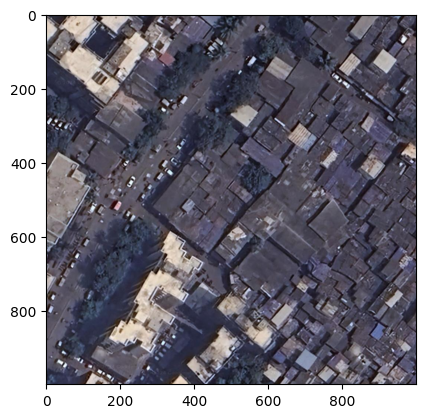

In [ ]:
import rasterio
from rasterio.plot import show

# Open the large GeoTIFF file
with rasterio.open('/root/satellite.tif') as src:
    # Define the window size (in pixels)
    window_width = 1000
    window_height = 1000

    # Define the starting pixel coordinates for the window
    start_x = 5000
    start_y = 5000

    # Read the specified window from the image
    subset = src.read(window=((start_y, start_y + window_height), (start_x, start_x + window_width)))

    # Plot the extracted subset
    show(subset)

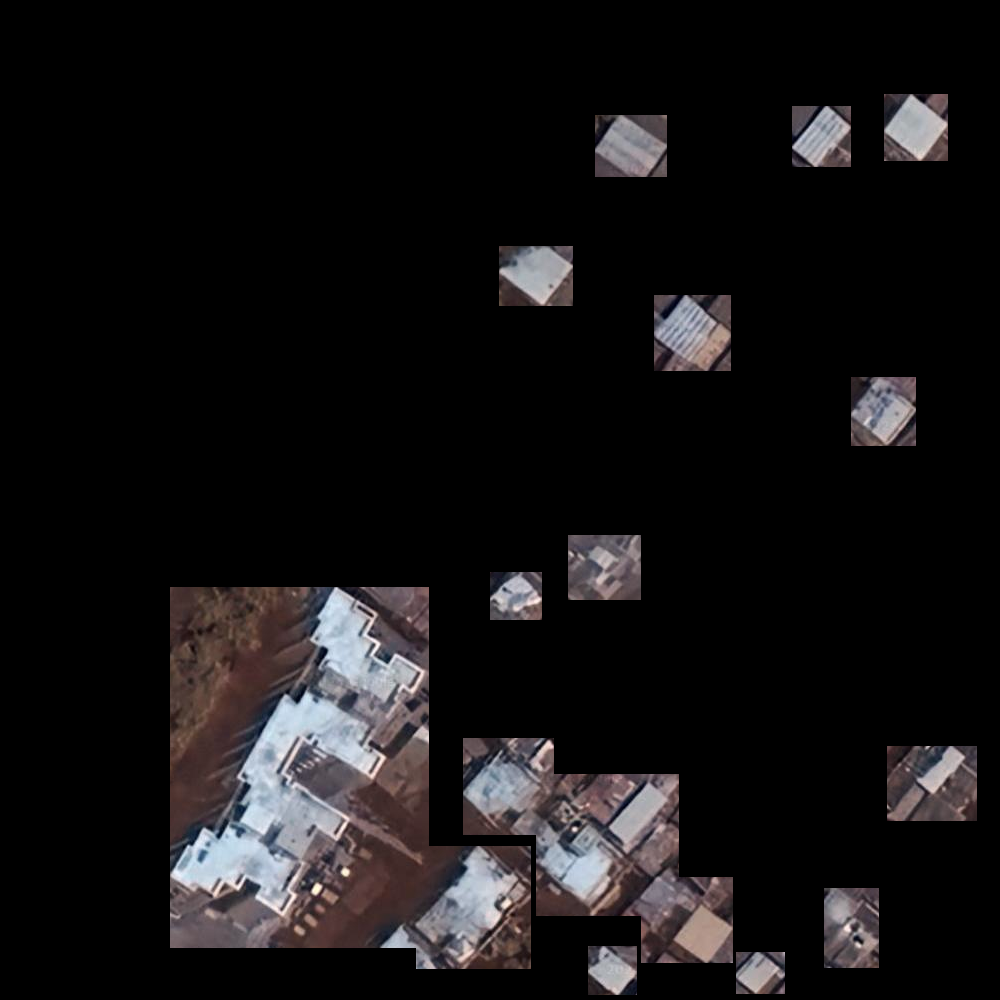

In [ ]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from google.colab.patches import cv2_imshow
import rasterio

def segment_roads(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Otsu's thresholding
    thresh = threshold_otsu(gray)
    binary = gray > thresh

    # Clean up binary image
    binary = closing(binary, square(6))
    binary = clear_border(binary)

    # Label connected components
    labeled_img = label(binary)

    # Extract properties of labeled regions
    regions = regionprops(labeled_img)

    # Extract regions representing roads based on area or other criteria
    road_regions = []
    for region in regions:
        if region.area > 1000:  # Example threshold for minimum road area
            road_regions.append(region)

    # Create a mask for road regions
    mask = np.zeros_like(gray)
    for region in road_regions:
        minr, minc, maxr, maxc = region.bbox
        mask[minr:maxr, minc:maxc] = 1

    # Apply mask to original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    return segmented_image

# Open the large GeoTIFF file
with rasterio.open('/root/satellite.tif') as src:
    # Define the window size (in pixels)
    window_width = 1000
    window_height = 1000

    # Define the starting pixel coordinates for the window
    start_x = 5000
    start_y = 5000

    # Read the specified window from the image
    subset = src.read(window=((start_y, start_y + window_height), (start_x, start_x + window_width)))

# Convert the subset to RGB format
subset_rgb = np.transpose(subset, [1, 2, 0])

# Apply image segmentation to the extracted subset
segmented_subset = segment_roads(subset_rgb)

# Display segmented image
cv2_imshow(segmented_subset)



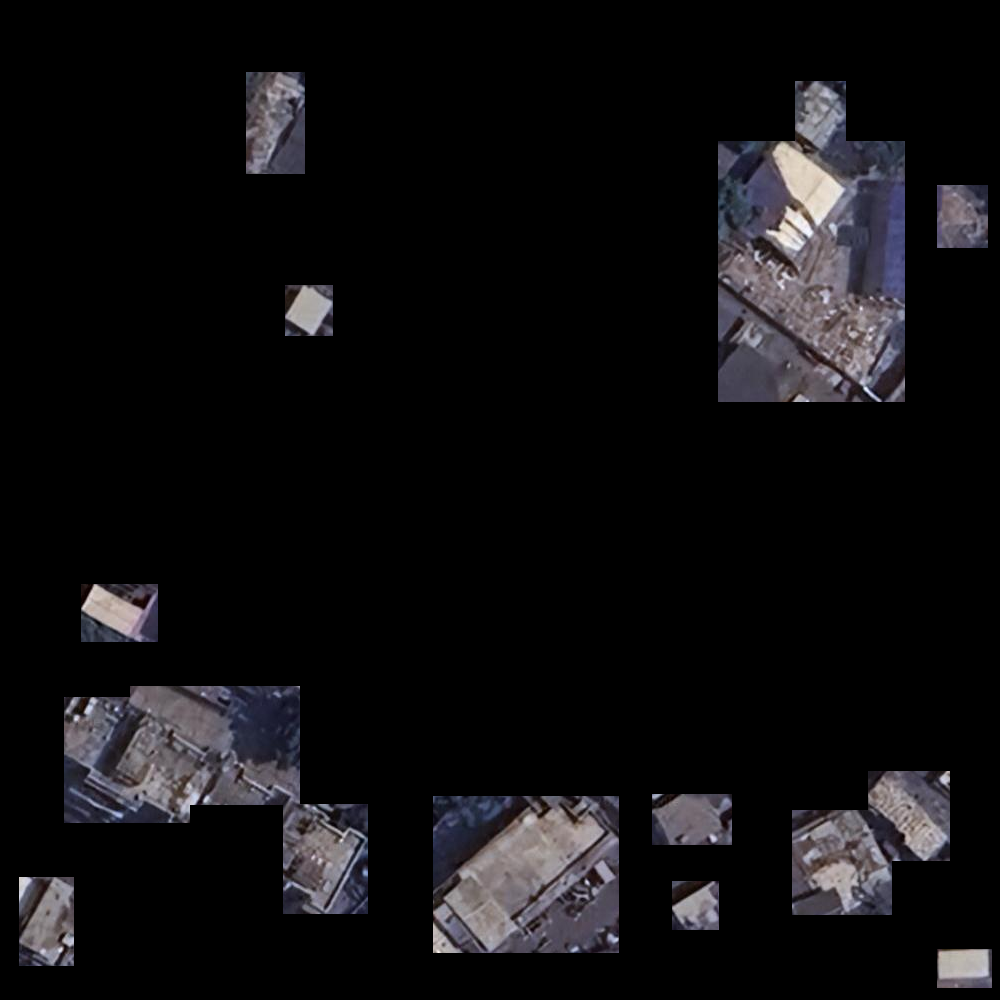

In [ ]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from google.colab.patches import cv2_imshow
import rasterio

# Function to segment roads from an image
def segment_roads(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    thresh = threshold_otsu(gray)
    binary = gray > thresh

    # Clean up binary image
    binary = closing(binary, square(3))
    binary = clear_border(binary)

    # Label connected components
    labeled_img = label(binary)

    # Extract properties of labeled regions
    regions = regionprops(labeled_img)

    # Extract regions representing roads based on area or other criteria
    road_regions = []
    for region in regions:
        if region.area > 1000:  # Example threshold for minimum road area
            road_regions.append(region)

    # Create a mask for road regions
    mask = np.zeros_like(gray)
    for region in road_regions:
        minr, minc, maxr, maxc = region.bbox
        mask[minr:maxr, minc:maxc] = 1

    # Apply mask to original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    return segmented_image

# Load the large GeoTIFF file
with rasterio.open('/root/satellite.tif') as src:
    # Define the window size and starting pixel coordinates
    window_width = 1000
    window_height = 1000
    start_x = 2000
    start_y = 2000  # Adjust these coordinates to select a different region

    # Read the specified window from the image
    subset = src.read(window=((start_y, start_y + window_height), (start_x, start_x + window_width)))

    # Convert the subset image to OpenCV format (BGR)
    subset_bgr = cv2.cvtColor(subset.transpose(1, 2, 0), cv2.COLOR_RGB2BGR)

    # Apply road segmentation to the extracted subset
    segmented_subset = segment_roads(subset_bgr)

    # Display segmented image
    cv2_imshow(segmented_subset)




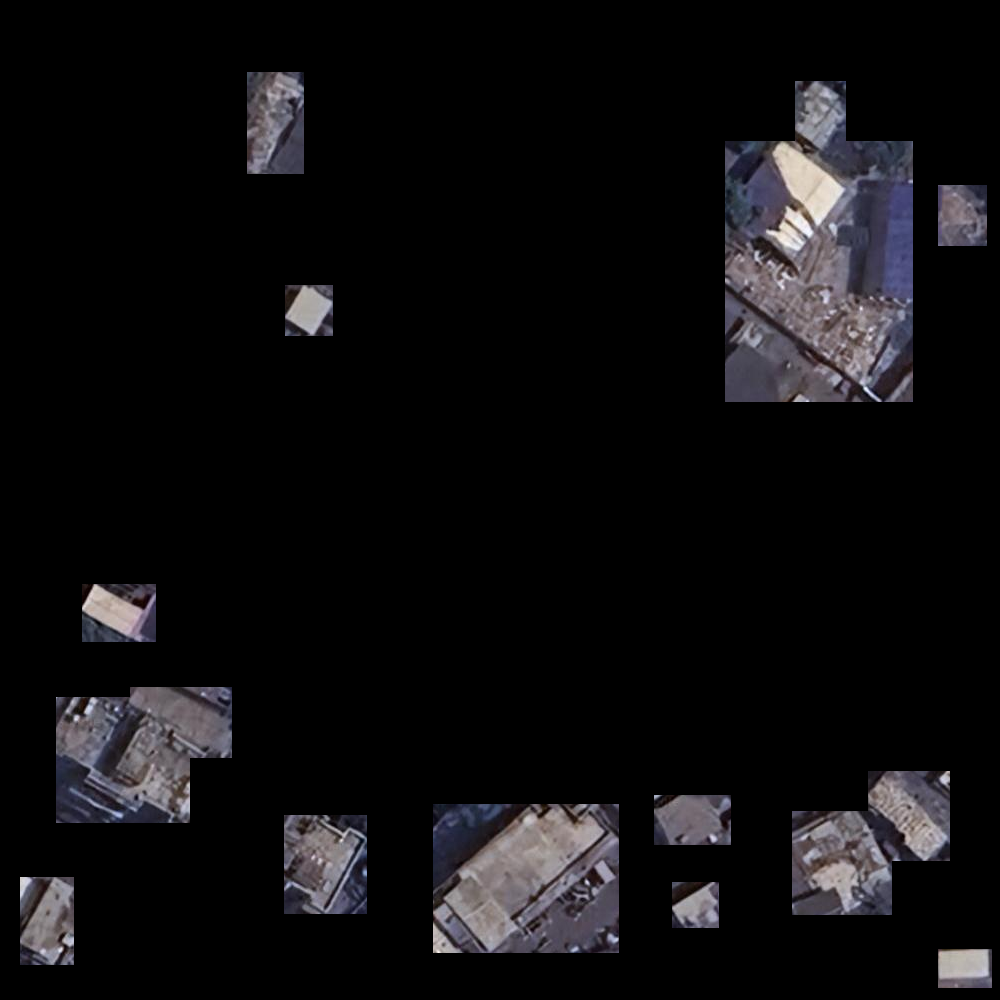

In [ ]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from google.colab.patches import cv2_imshow

def segment_roads(image):
    # Preprocessing
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Clean up binary image
    binary = closing(binary, square(3))
    binary = clear_border(binary)

    # Label connected components
    labeled_img = label(binary)

    # Extract properties of labeled regions
    regions = regionprops(labeled_img)

    # Extract regions representing roads based on area or other criteria
    road_regions = []
    for region in regions:
        if region.area > 1000:  # Example threshold for minimum road area
            road_regions.append(region)

    # Create a mask for road regions
    mask = np.zeros_like(gray)
    for region in road_regions:
        minr, minc, maxr, maxc = region.bbox
        mask[minr:maxr, minc:maxc] = 1

    # Apply mask to original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    return segmented_image

# Example usage
segmented_subset = segment_roads(subset_bgr)
cv2_imshow(segmented_subset)



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2

# Load the DeepLabv3 model from TensorFlow Hub
model = hub.load("https://tfhub.dev/google/deeplabv3/1")

# Function to perform semantic segmentation
def perform_semantic_segmentation(image):
    # Resize the input image to the expected size (513x513)
    resized_image = tf.image.resize_with_pad(image, target_height=513, target_width=513)

    # Normalize pixel values to [0, 1]
    normalized_image = tf.cast(resized_image, dtype=tf.float32) / 255.0

    # Add a batch dimension
    input_image = tf.expand_dims(normalized_image, 0)

    # Perform semantic segmentation
    result = model(input_image)

    # Remove the batch dimension from the output
    segmented_image = tf.squeeze(result['decoded_logits'], axis=0)

    # Convert the segmented image to numpy array
    segmented_image = segmented_image.numpy()

    return segmented_image

# Example usage
image_path = 'your_image.jpg'  # Path to your input image
input_image = cv2.imread(image_path)

# Convert image from BGR to RGB
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Perform semantic segmentation
segmented_image = perform_semantic_segmentation(input_image)

# Display the segmented image
cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



OSError: https://tfhub.dev/google/deeplabv3/1 does not appear to be a valid module.

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Load the DeepLabv3 model from the local file system
model_path = 'path/to/deeplabv3/model'  # Replace with the path to the downloaded model
model = tf.saved_model.load(model_path)

# Function to perform semantic segmentation
def perform_semantic_segmentation(image):
    # Preprocess the input image
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = tf.image.resize(input_tensor, [513, 513])
    input_tensor = tf.expand_dims(input_tensor, 0)

    # Perform semantic segmentation
    result = model(input_tensor)

    # Extract the segmented image from the result
    segmented_image = result['decoded_logits'][0].numpy()

    return segmented_image

# Example usage
image_path = 'your_image.jpg'  # Path to your input image
input_image = cv2.imread(image_path)

# Convert image from BGR to RGB
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Perform semantic segmentation
segmented_image = perform_semantic_segmentation(input_image)

# Display the segmented image
cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



OSError: SavedModel file does not exist at: path/to/deeplabv3/model/{saved_model.pbtxt|saved_model.pb}

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [ ]:
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)